In [193]:
%load_ext autoreload
%autoreload 2

from lib import *

Torch device: cuda:0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


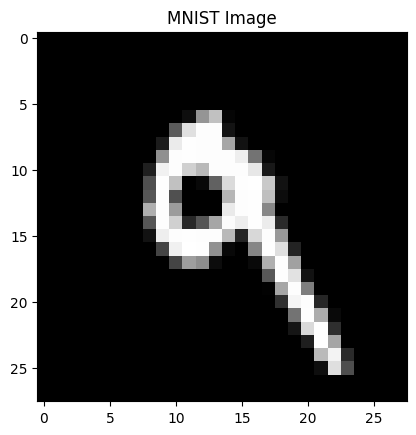

In [150]:
train_data = torchvision.datasets.MNIST(root='./data',
                   train=True,
                   download=True,
                   transform=torchvision.transforms.ToTensor())

test_data = torchvision.datasets.MNIST(root='./data',
                   train=False,
                   download=True,
                   transform=torchvision.transforms.ToTensor())

train_X, train_Y = train_data.data.numpy(), train_data.targets.numpy()
test_X, test_Y = test_data.data.numpy(), test_data.targets.numpy()
train_X_sm, train_Y_sm = train_X[:1000,:], train_Y[:1000]

# has circle and line
sample_1 = test_X[7]
show_mnist(sample_1)

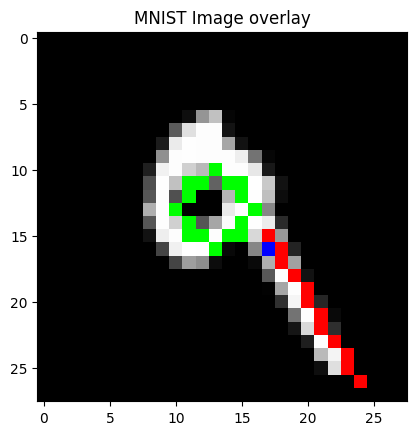

In [43]:
sample_1_lines = np.array([[17,15,24,26],[np.nan,np.nan,np.nan,np.nan]])
sample_1_circles = np.array([[13,13,3],[np.nan,np.nan,np.nan]])
sample_1_corners = np.array([[17,16],[np.nan,np.nan]])
show_overlay(sample_1,sample_1_lines,sample_1_circles,sample_1_corners)

Torch device: cuda:0


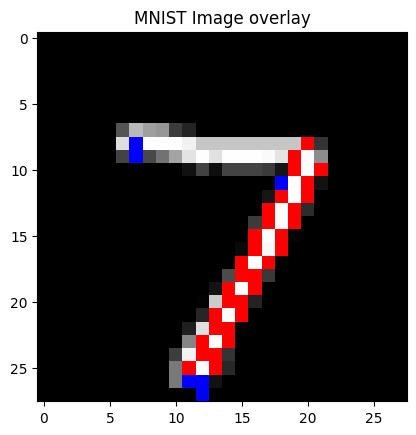

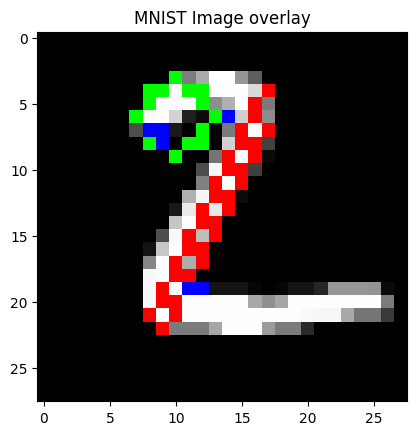

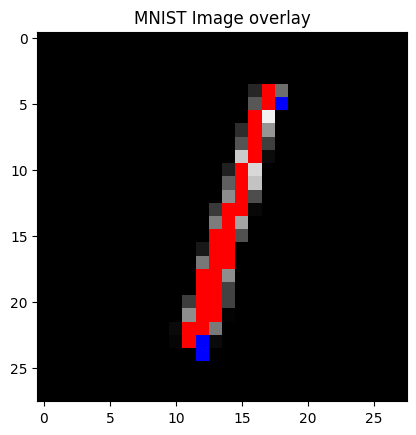

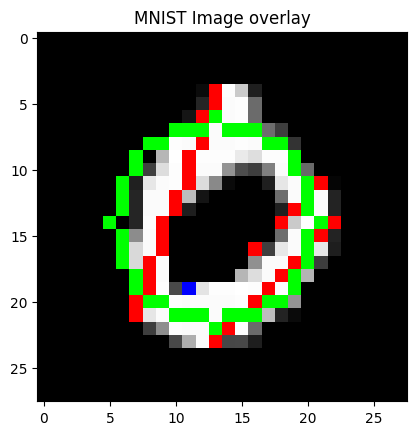

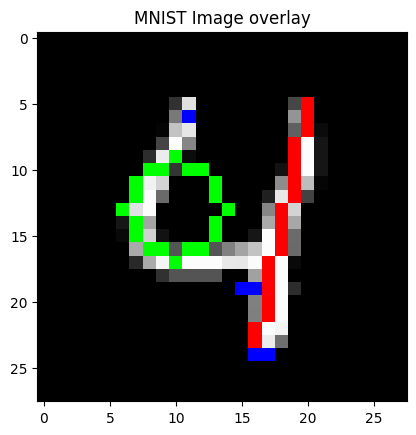

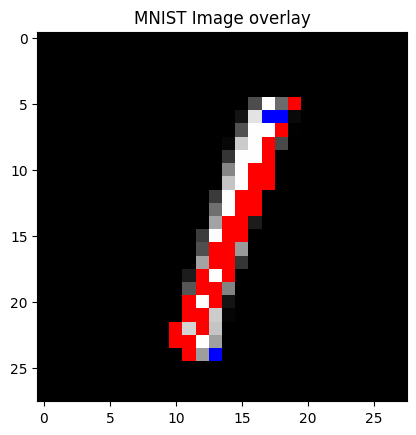

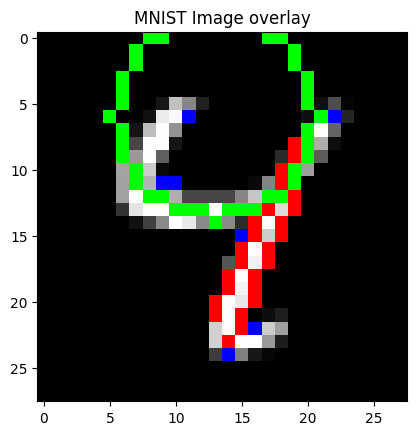

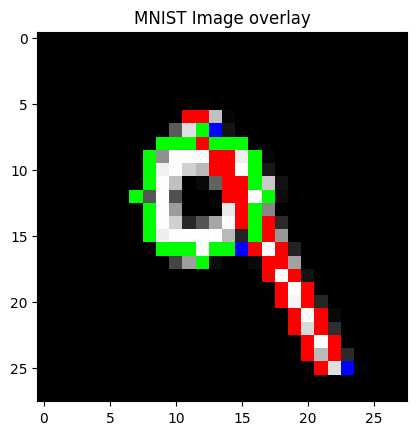

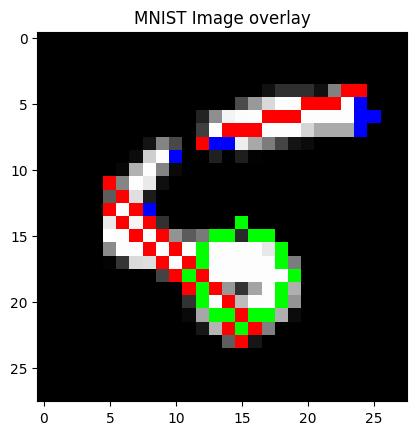

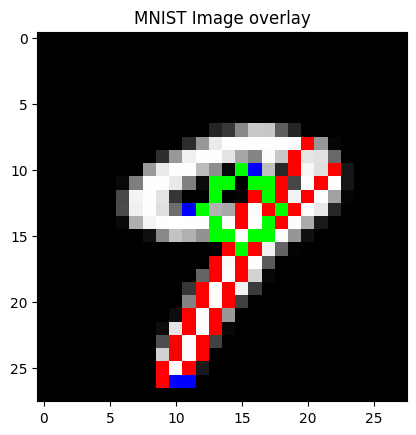

In [166]:
for i in range(10):
    show_overlay(test_X[i],
                 get_lines(test_X[i]),
                 get_circles(test_X[i]),
                 get_corners(test_X[i]))

In [180]:
train_X_features = np.array([get_features(x) for x in train_X])
test_X_features = np.array([get_features(x) for x in test_X])

In [191]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(train_X_features.reshape(60000,-1),train_Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [192]:
clf.score(test_X_features.reshape(10000,-1),test_Y)

0.8735

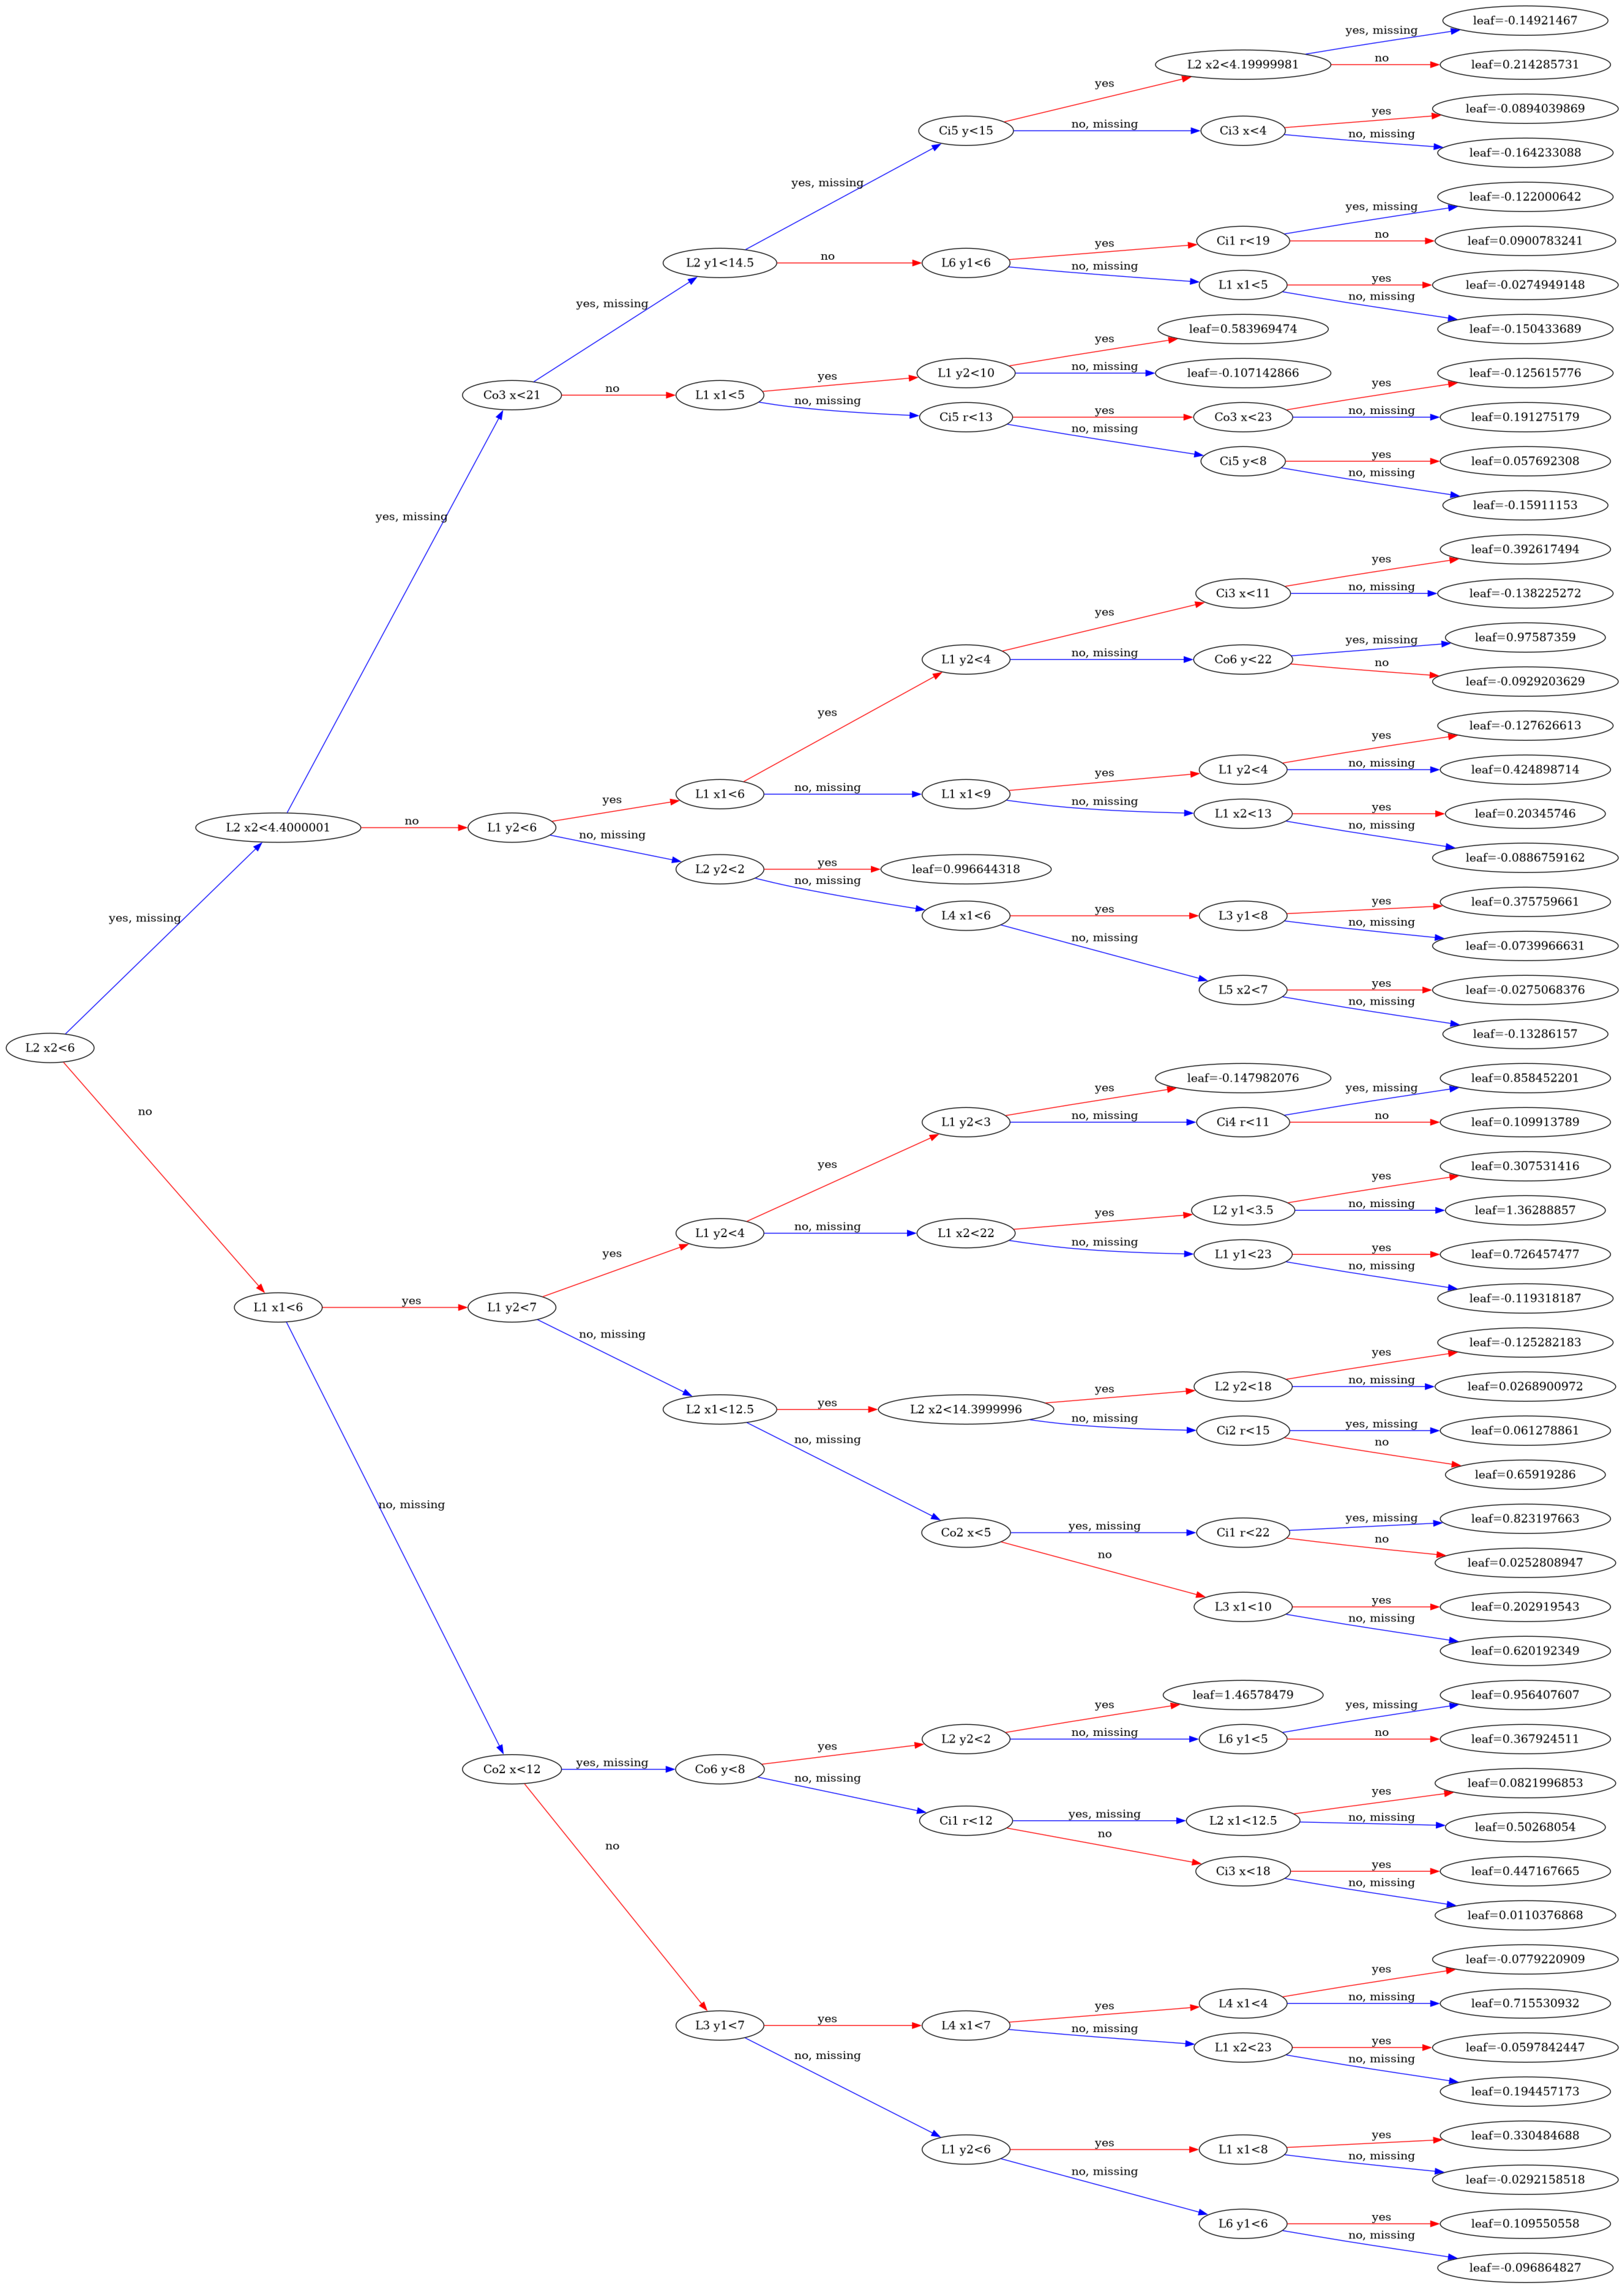

In [202]:
from xgboost import plot_tree
clf.get_booster().feature_names = get_feature_names()
plot_tree(clf, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('xgb.png')

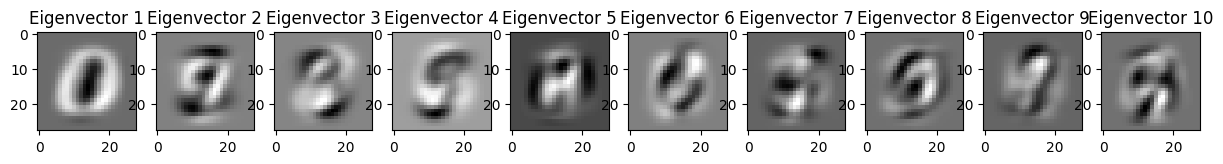

In [22]:
eigenimages = train_PCA.components_.reshape((n_components, 28, 28))

# Plot the eigenimages
plt.figure(figsize=(15, 3))
for i in range(n_components):
    plt.subplot(1, n_components, i + 1)
    plt.imshow(eigenimages[i], cmap='gray')
    plt.title(f'Eigenvector {i + 1}')


In [197]:
dot_data = xgb.to_graphviz(clf)
graph = graphviz.Source(dot_data, format="svg")
graph.render("decision_tree_graphivz")

AttributeError: 'Source' object has no attribute 'splitlines'